In [1]:
# import numpy as np
# from sklearn.preprocessing import Imputer

# ratings = data['review_scores_rating']
# imp = Imputer(missing_values=np.nan, strategy='mean', axis=1)
# ratings = np.array(ratings).reshape(1, -1)
# imp.fit(ratings)
# ratings = imp.transform(ratings)
# ratings.shape
# sample_idxs = np.random.randint(ratings.shape[1], size=1000)
# sample_idxs
# np.take(ratings, sample_idxs)

In [5]:
from feature_selector import FeatureSelector

In [2]:
# import math
# import matplotlib.pyplot as plt
# plt.hist(np.take(ratings, sample_idxs))
# len(data.columns)
# len(data.sample(1).values[0])
# for k, v in zip(data.columns, data.sample(1).values[0]): print k + ': ' + str(v)

In [6]:
import pandas as pd

In [7]:
all_data = pd.read_csv('./data/review_features.csv', low_memory=False)

In [10]:
data = all_data.sample(10000, random_state=1)

In [11]:
data_labels = data['review_scores_rating']

In [12]:
data = data.drop(columns = ['review_scores_rating'])

In [13]:
fs = FeatureSelector(data=data, labels=data_labels)

In [19]:
fs.identify_missing(missing_threshold=0.5)

10 features with greater than 0.50 missing values.



In [23]:
fs.identify_collinear(correlation_threshold=0.75)

28 features with a correlation magnitude greater than 0.75.



In [24]:
fs.identify_single_unique()

5 features with a single unique value.



In [28]:
fs.identify_zero_importance(task='regression', eval_metric='rmse')

Training Gradient Boosting Model



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
fs.identify_low_importance(cumulative_importance=0.9)

NotImplementedError: Feature importances have not yet been determined. 
                                         Call the `identify_zero_importance` method first.

In [5]:
data = all_data.sample(50000, random_state=1)
cols_to_drop = ['access', 'amenities_', 'description', \
               'house_rules', 'id', 'host_verifications', 'last_review', 'last_scraped', \
               'market', 'neighborhood_overview', 'neighbourhood', 'neighbourhood_cleansed', \
               'neighbourhood_group_cleansed', 'notes', 'street', 'summary', 'transit', \
               'Unnamed: 0', 'first_review', 'calendar_last_scraped', 'calendar_updated', 
               'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', \
                'review_scores_communication', 'review_scores_location']
data.loc[:, cols_to_drop]
data = data.drop(cols_to_drop, axis=1)

data = data.replace('f', 0)
data = data.replace('t', 1)
data = data.replace(r'[\$,]','', regex=True)
# data['review_scores_rating']


# Get a list of non-numeric columns so we can drop them
from collections import defaultdict

non_numeric_columns = defaultdict(int)

for d in data.values:
    for k, v in zip(data.columns, d):
        if 'Mission' == v:
            print k, v
        
        try: 
            float(v)
        except Exception as e:
            non_numeric_columns[k] += 1

print non_numeric_columns.keys()
# data = data.drop(non_numeric_columns.keys(), axis=1)

host_total_listings_count Mission
host_total_listings_count Mission
host_total_listings_count Mission
host_total_listings_count Mission
host_total_listings_count Mission
host_total_listings_count Mission
host_total_listings_count Mission
['bathrooms', 'host_has_profile_pic', 'cancellation_policy', 'host_neighbourhood', 'host_acceptance_rate', 'property_type', 'host_location', 'space', 'zipcode', 'host_since', 'host_identity_verified', 'host_listings_count', 'bedrooms', 'host_response_rate', 'host_about', 'calculated_host_listings_count', 'interaction', 'name', 'license', 'host_response_time', 'beds', 'cleaning_fee', 'host_name', 'guests_included', 'host_total_listings_count']


In [6]:
dependent_variable = 'review_scores_rating'

In [7]:
# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])
y = data[dependent_variable]

In [8]:
# Test for collinearity

collinear = data.corr()
s = collinear.unstack()
so = s.sort_values(kind='quicksort')
so.to_csv('collinearity_values.csv')

In [9]:
# so[-1*(len(so)):-1*(len(so)-100)]

In [10]:
# read most correlated columns from csv, and drop them

corr_cols_to_drop = pd.read_csv('./correlated_columns.csv', encoding='utf8').values.reshape(1,-1).tolist()[0]

In [11]:
# drop review_ related columns
review_columns = defaultdict(int)
for c in data.columns:
    if 'review' in c:
        review_columns[c] += 1
review_columns.keys()

['reviews_per_month',
 'number_of_reviews',
 'review_scores_value',
 'review_scores_rating']

In [12]:
# Drop zipcode, longitude, latitude and such
others = ['zipcode', 'latitude', 'longitude']

In [13]:
cols_to_drop = set(review_columns.keys()).union(non_numeric_columns.keys()).union(corr_cols_to_drop).union(others)
# cols_to_drop

In [14]:
X = data.drop(cols_to_drop, axis=1)

In [15]:
for c in X.columns:
    if 'review' in c:
        print c

In [16]:
import numpy as np
from sklearn.preprocessing import Imputer


imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(X)
X = imp.transform(X)

imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
imp.fit(y)
y = imp.transform(y.values.reshape(-1,1))
y = y.ravel()

print X.shape
print y.shape

# imp.fit(X_train)
# X_train = imp.transform(X_train)

# imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
# imp.fit(X_test)
# X_test = imp.transform(X_test)


# y_train = np.array(y_train).reshape(1, -1)
# imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
# imp.fit(y_train)
# y_train = imp.transform(y_train)
# y_train = y_train.reshape(-1, 1)
# y_train = y_train.ravel()

# y_test = np.array(y_test).reshape(1, -1)
# imp = Imputer(missing_values=np.nan, strategy='median', axis=1)
# imp.fit(y_test)
# y_test = imp.transform(y_test)
# y_test = y_test.reshape(-1, 1)
# y_test = y_test.ravel()

# print X_train.shape
# print y_train.ravel().shape

(38874, 158)
(38874,)


In [17]:
# Scale the dependent variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)
X = scaler.transform(X)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(y.reshape(-1,1))
y = scaler.transform(y.reshape(-1,1))
y = y.ravel()

In [18]:
print X.shape
print y.shape

(38874, 158)
(38874,)


In [19]:
# Try PCA
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=30)
X = pca.fit_transform(X)


In [20]:
print X.shape
print y.shape

(38874, 30)
(38874,)


In [21]:
import matplotlib.pyplot as plt
plt.hist(y.tolist(), bins=100)

(array([1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.900e+01, 0.000e+00, 1.000e+00, 7.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.740e+02, 0.000e+00, 1.000e+00, 5.000e+00, 9.000e+00, 1.400e+01,
        5.000e+00, 5.100e+01, 3.900e+01, 1.800e+01, 1.110e+02, 1.200e+01,
        1.900e+01, 9.900e+01, 3.500e+01, 8.100e+01, 6.500e+01, 5.300e+01,
        6.300e+01, 3.500e+01, 1.204e+0

In [22]:
# Try KernelPCA

# kcpa = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
# X = kcpa.fit_transform(X)

# print X.shape
# print y.shape

In [23]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2)

# X = poly.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1234)

Mean squared error: 0.87
Variance score: 0.08


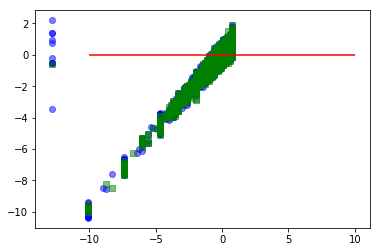

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score

# Create linear regression object
regr = linear_model.Lasso(alpha=0.0001, fit_intercept=False, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))

# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=-10, xmax=10, color='r')
plt.show()

In [26]:
def squared_err(org, prd):
    return sum((org-prd)**2)

In [27]:
def coeff_of_determination(org, prd):
    mean_org = np.mean(org)
    mean_prd = [mean_org for y in org]
    squared_error_regr = squared_err(org, prd)
    print squared_error_regr 
    
    squared_error_y_mean = squared_err(org, mean_prd)
    print squared_error_y_mean
    
    return 1 - (squared_error_regr / squared_error_y_mean)

In [28]:
squared_err(y_test, y_pred)

11180.842695934025

In [29]:
coeff_of_determination(y_test, y_pred)

11180.842695934025
12212.123812963167


0.08444731914152703

In [30]:
i = 0
for act, pred in zip(y_train_pred, y_train_pred.tolist()):
    if i <= 10:
        i += 1
        print act, pred

0.23389391594368478 0.233893915944
0.4311435325589966 0.431143532559
0.07514893528639507 0.0751489352864
0.1416767044905962 0.141676704491
0.427242272470889 0.427242272471
0.2354930536090512 0.235493053609
0.026940689273144525 0.0269406892731
-0.7782760711043168 -0.778276071104
0.12904590697863078 0.129045906979
-0.1654033716741362 -0.165403371674
0.20740747796842418 0.207407477968


In [31]:
print np.min(y_test)
print np.max(y_test)

-12.809436246883383
0.7500369178942572


In [32]:
print np.min(y_pred)
print np.max(y_pred)

-12.220297684594179
1.0184625175661925


In [33]:
# MSE without dropping nan from predictor
# Mean squared error: 47.72
# Variance score: 0.08


Mean squared error: 0.87
Variance score: 0.08


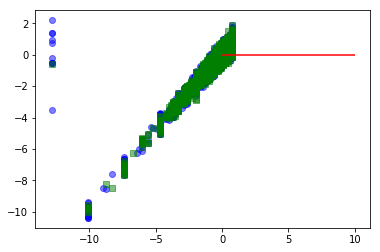

In [34]:
import math

# Create linear regression object
regr = linear_model.ElasticNet(normalize=False, alpha=0.001, fit_intercept=False)

y_traint = y_train
y_testt = y_test

# Train the model using the training sets
regr.fit(X_train, y_traint)



y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_testt, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_testt, y_pred))

# Plot the residuals
plt.scatter(y_traint, y_traint-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_testt, y_testt-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=10, color='r')
plt.show()

In [35]:
print np.min(y_test)
print np.max(y_test)

-12.809436246883383
0.7500369178942572


In [36]:
print np.min(y_train)
print np.max(y_train)

-12.809436246883383
0.7500369178942572


Mean squared error: 0.87
Variance score: 0.08


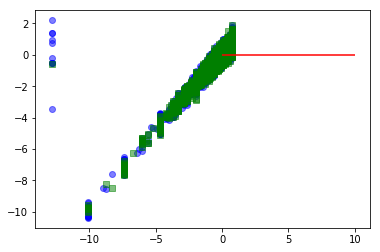

In [37]:
import math

# Create linear regression object
# regr = linear_model.ElasticNet(normalize=True, alpha=0.05, fit_intercept=True)

# y_traint = np.array(map(lambda x: math.log(x+1), y_train))
# y_testt = np.array(map(lambda x: math.log(x+1), y_test))

y_traint = y_train
y_traint_var = np.var(y_traint)
y_traint_weights = np.array(map(lambda x: 1/y_traint_var, y_traint))

y_testt = y_test
y_testt_var = np.var(y_testt)
y_testt_weights = np.array(map(lambda x: 1/y_testt_var, y_testt))


regr = linear_model.LinearRegression(fit_intercept=True, normalize=False)


# Train the model using the training sets
regr.fit(X_train, y_traint, sample_weight=y_traint_weights)



y_train_pred = map(lambda x: round(x, 8), regr.predict(X_train))

# Make predictions using the testing set
y_pred = map(lambda x: round(x, 8), regr.predict(X_test))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_testt, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_testt, y_pred))

# Plot the residuals
plt.scatter(y_traint, y_traint-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_testt, y_testt-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=10, color='r')
plt.show()

In [38]:
#  The bias and heteroscadasticity is epic in the redisual plot
# Let's transform the dependent variable


In [39]:
for i, j in zip(y_test[:20], y_pred[:20]): print i, j

-0.334720935287954 0.11192135
-0.0635314719924012 -0.24147056
-2.7754261049479294 -0.23693917
-0.0635314719924012 0.13830613
-0.334720935287954 0.0252534
0.7500369178942572 0.26367886
0.7500369178942572 -0.25238365
0.6144421862464808 0.37644797
-0.334720935287954 -0.05021261
0.47884745459870437 0.09278566
0.7500369178942572 0.4324657
0.47884745459870437 0.01412501
-0.0635314719924012 0.01963398
0.7500369178942572 -0.10114327
0.0720632596553752 0.0676813
0.7500369178942572 0.16586881
-0.6059103985835068 -0.28806576
0.47884745459870437 0.20212958
0.7500369178942572 0.65338058
0.6144421862464808 0.34660022


In [40]:
# With imputing by mean
# Mean squared error: 18099081.99
# Variance score: -371456.56

In [41]:
from sklearn import neural_network

# Create neural net object
nn = neural_network.MLPRegressor(alpha=0.0001, warm_start=False, activation='relu', \
                                learning_rate='invscaling', solver='sgd', max_iter=10000, 
                                hidden_layer_sizes=(1000,20,100))

# Train the model using the training sets
nn.fit(X_train, y_train)

y_train_pred = nn.predict(X_train)

# Make predictions using the testing set
y_pred = nn.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.tolist(), y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.tolist(), y_pred))


Mean squared error: 0.92
Variance score: 0.03


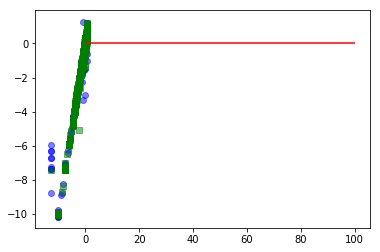

In [42]:
# Plot the residuals
plt.scatter(y_train, y_train-y_train_pred, c='b', marker='o', alpha=0.5)
plt.scatter(y_test, y_test-y_pred, c='g', marker='s', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=100, color='r')
plt.show()

In [43]:
for i, j in zip(y_test[:20], y_pred[:20]): print i, j

-0.334720935287954 0.0017576517259489527
-0.0635314719924012 -0.20427210993915731
-2.7754261049479294 -0.03791139946231087
-0.0635314719924012 -0.012120871122726043
-0.334720935287954 -0.06207237865300885
0.7500369178942572 0.0025297205530087213
0.7500369178942572 -0.08735633583871147
0.6144421862464808 0.0013234081422578148
-0.334720935287954 0.007329836929183625
0.47884745459870437 0.08120397133789517
0.7500369178942572 0.11041033932175352
0.47884745459870437 -0.024729898258110228
-0.0635314719924012 -0.0054796656887574485
0.7500369178942572 -0.02181665185284251
0.0720632596553752 -0.05915730179074444
0.7500369178942572 0.0930631166546982
-0.6059103985835068 -0.01893857696712814
0.47884745459870437 0.12342788108292274
0.7500369178942572 0.16377378665896153
0.6144421862464808 0.1078300419387901
